Imports

In [129]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Data loading

In [130]:
df = pd.read_csv('Data\compare_datasets_F1score.csv')

df['dataset'] = df['dataset'].replace('CP_Cellprofiler', 'CP_HC')

df

,Classifier,F1 Score clusters (max),F1 Score clusters (mean),F1 Score (pca),dataset
0,LDA,0.972585,0.874574,0.986087,IF_deep
1,Naive Bayes,0.935582,0.873475,0.993043,IF_deep
2,Nearest Neighbors,0.979057,0.934345,1.000000,IF_deep
3,RBF SVM,0.979057,0.928910,1.000000,IF_deep
4,linear SVM,0.972101,0.898786,1.000000,IF_deep
5,LDA,0.774417,0.660380,0.836179,IF_HC
6,Naive Bayes,0.755615,0.670670,0.857906,IF_HC
7,Nearest Neighbors,0.786261,0.641119,0.789215,IF_HC
8,RBF SVM,0.742624,0.652067,0.885959,IF_HC
9,linear SVM,0.780484,0.691190,0.880631,IF_HC


Plotting

C:\Users\JohannesWilbertz\AppData\Local\Temp\ipykernel_23324\1574260192.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right', rotation_mode="anchor")


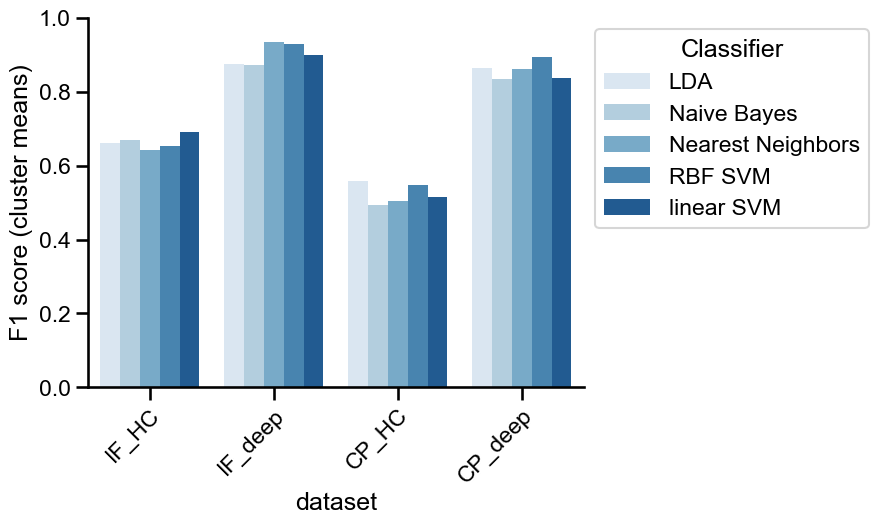

In [131]:
# Plot aesthetics
# Set the style and font
plt.rcParams["font.family"] = "Arial"
sns.set_context('talk')

# Data to plot
y = "F1 Score clusters (mean)" # "F1 Score clusters (mean)", "F1 Score clusters (max)"
order = ['IF_HC', 'IF_deep', 'CP_HC', 'CP_deep']

# Barplot
ax = sns.barplot(data=df, x="dataset", y=y, hue="Classifier", palette="Blues", order=order)

# Plot design
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine()
ax.set_ylim(0, 1)
ax.set_ylabel('F1 score (cluster means)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right', rotation_mode="anchor")

# Saving plot
plt.savefig('Classifier' + y + '.pdf', bbox_inches='tight')

plt.show()

Data loading per dataset

In [132]:
dataset = 'CP' #IF, CP
analysis = 'HC' #HC, deep

df2 = pd.read_csv(f'Data/classification_results_{dataset}_{analysis}.csv')

# Remove PCA data
df2 = df2[df2['Profile'] != 'pca']

# Change name of category in Profile column
df2['Profile'] = df2['Profile'].str.split('_').str[1].astype(int)

print(df2)

      Classifier  Profile  F1 Score
1     linear SVM        4  0.423494
2     linear SVM        5  0.431541
3     linear SVM        6  0.400241
4     linear SVM        7  0.473936
5     linear SVM        8  0.584671
..           ...      ...       ...
110  Naive Bayes       21  0.448703
111  Naive Bayes       22  0.430437
112  Naive Bayes       23  0.415024
113  Naive Bayes       24  0.498039
114  Naive Bayes       25  0.515637

[110 rows x 3 columns]


Plotting

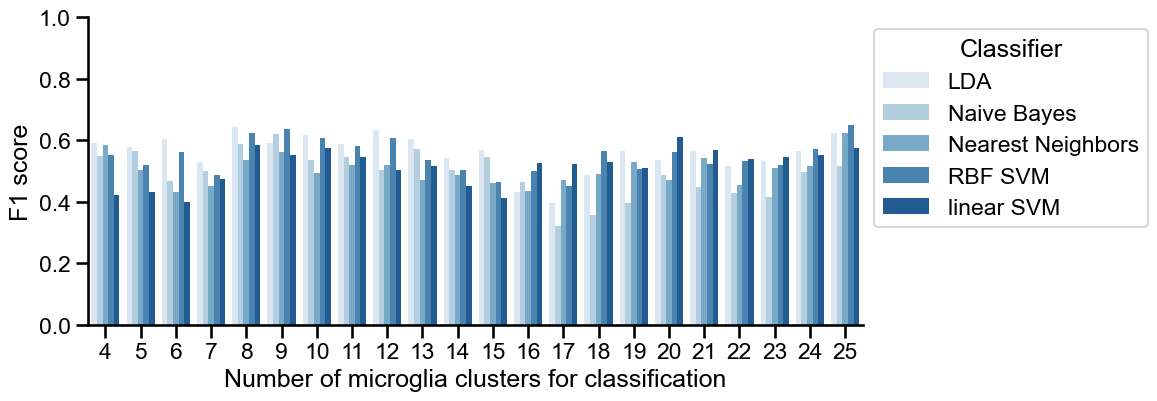

In [133]:
# Plot aesthetics
# Set the style and font
plt.rcParams["font.family"] = "Arial"
sns.set_context('talk')

# Create the plot
plt.figure(figsize=(10, 4))

# Data to plot
y = "F1 Score" # "F1 Score clusters (mean)", "F1 Score clusters (max)"
hue_order = ['LDA', 'Naive Bayes', 'Nearest Neighbors', 'RBF SVM', 'linear SVM']

# Barplot
ax = sns.barplot(data=df2, x="Profile", y=y, hue="Classifier", hue_order=hue_order, palette="Blues")

# Plot design
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine()
ax.set_ylim(0, 1)
ax.set_xlabel('Number of microglia clusters for classification')
ax.set_ylabel('F1 score')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right', rotation_mode="anchor")

# Saving plot
#plt.savefig('Classifier_' + dataset + '_' + analysis + '_' + y + '.pdf', bbox_inches='tight')

plt.show()

Determine most predictive cluster number

In [134]:
result = df2[df2['Profile'] != 'pca'].groupby('Profile')['F1 Score'].mean()
highest_mean = result.max()
best_profile = result.idxmax()
print(f"Highest mean F1 Score: {highest_mean}, Profile: {best_profile}")


Highest mean F1 Score: 0.5980413717011384, Profile: 25


Mean of all classifiers per cluster

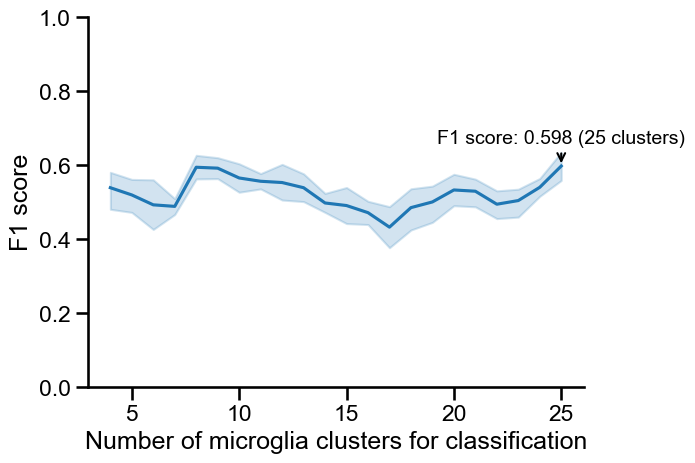

In [135]:
# Plot aesthetics
plt.rcParams["font.family"] = "Arial"
sns.set_context('talk')

# Create the plot
data = df2[df2['Profile'] != 'pca']
y = "F1 Score"

# Line plot
ax = sns.lineplot(data=data, x="Profile", y=y)

# Annotate the highest mean F1 Score and cluster number
ax.annotate(f'F1 score: {highest_mean:.3f} ({best_profile} clusters)',
            xy=(best_profile, highest_mean),
            xytext=(best_profile, highest_mean + 0.06),
            ha='center',
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=14, color='black')

# Plot design
sns.despine()
ax.set_ylim(0, 1)
ax.set_xlabel('Number of microglia clusters for classification')
ax.set_ylabel('F1 score')

# Save the plot
#plt.savefig('Classifier_Means_' + dataset + '_' + analysis + '_' + y + '.pdf', bbox_inches='tight')
plt.show()


Plot all datasets together

     Dataset  Profile         Classifier  F1 Score
0      CP_HC       10                LDA  0.615999
1      CP_HC       10        Naive Bayes  0.535490
2      CP_HC       10  Nearest Neighbors  0.494799
3      CP_HC       10            RBF SVM  0.606412
4      CP_HC       10         linear SVM  0.576098
..       ...      ...                ...       ...
435  IF_deep        9                LDA  0.875180
436  IF_deep        9        Naive Bayes  0.898754
437  IF_deep        9  Nearest Neighbors  0.965071
438  IF_deep        9            RBF SVM  0.937241
439  IF_deep        9         linear SVM  0.937024

[440 rows x 4 columns]


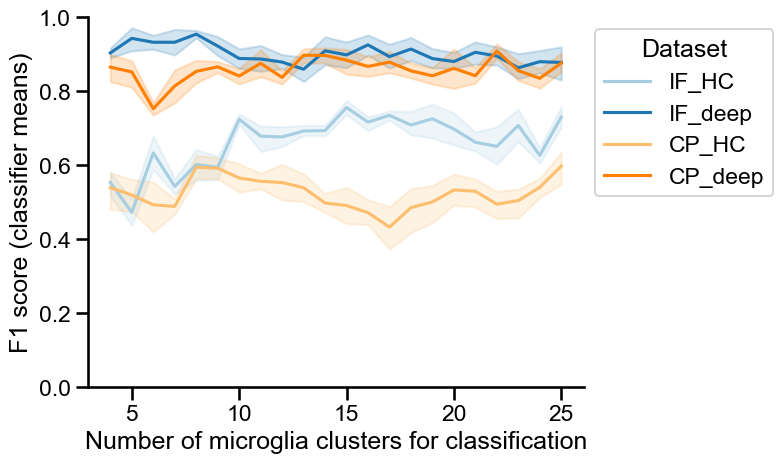

In [137]:
# Load all data
df_IF_HC = pd.read_csv('Data/classification_results_IF_HC.csv')
df_IF_deep = pd.read_csv('Data/classification_results_IF_deep.csv')
df_CP_HC = pd.read_csv('Data/classification_results_CP_HC.csv')
df_CP_deep = pd.read_csv('Data/classification_results_CP_deep.csv')


# Create dataset column
df_IF_HC['Dataset'] = 'IF_HC'
df_IF_deep['Dataset'] = 'IF_deep'
df_CP_HC['Dataset'] = 'CP_HC'
df_CP_deep['Dataset'] = 'CP_deep'

# Merge all DataFrames
merged_df = pd.concat([df_IF_HC, df_IF_deep, df_CP_HC, df_CP_deep], ignore_index=True)

# Remove PCA data and group
merged_df = (
    merged_df[merged_df['Profile'] != 'pca']
    .groupby(['Dataset', 'Profile', 'Classifier'])['F1 Score']
    .mean()
    .reset_index()
    )

# Change name of category in Profile column
merged_df['Profile'] = merged_df['Profile'].str.split('_').str[1].astype(int)

print(merged_df)

# Plot aesthetics
plt.rcParams["font.family"] = "Arial"
sns.set_context('talk')

# Get useful colors
paired_colors = sns.color_palette("Paired", 12)
# Choose custom colors
custom_colors = [paired_colors[0], paired_colors[1], paired_colors[6], paired_colors[7]]

# Create the plot
data = merged_df
y = "F1 Score"
hue_order = ['IF_HC', 'IF_deep', 'CP_HC', 'CP_deep']

# Line plot
ax = sns.lineplot(data=data, x="Profile", hue='Dataset', y=y, hue_order=hue_order, palette=custom_colors)

# Plot design
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine()
ax.set_ylim(0, 1)
ax.set_xlabel('Number of microglia clusters for classification')
ax.set_ylabel('F1 score (classifier means)')

# Save the plot
plt.savefig('Classifier_Means_AllDatasets.pdf', bbox_inches='tight')
plt.show()